# DC Metrorail Ridership Analysis (2019–2024)

This project explores daily Metrorail ridership trends in Washington, DC from 2019 to 2024, highlighting the impact of external events such as the COVID-19 pandemic.


#


## 1. Import Libraries

In [45]:
import pandas as pd



## 2. Load and Inspect Data


In [46]:
# Load the Excel file using the second row as header
df = pd.read_excel('data/Daily Ridership.xlsx', header=1)

# Preview the data
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Columns: 2193 entries, Mode to 12/31/24
dtypes: int64(2192), object(1)
memory usage: 34.4+ KB


,Mode,1/1/19,1/2/19,1/3/19,1/4/19,1/5/19,1/6/19,1/7/19,1/8/19,1/9/19,...,12/22/24,12/23/24,12/24/24,12/25/24,12/26/24,12/27/24,12/28/24,12/29/24,12/30/24,12/31/24
0,Bus,141809,369962,397204,386149,195569,166810,394049,406894,389806,...,184980,292357,239149,116612,257023,296062,201763,194756,313287,292875
1,Rail,110601,460750,497421,472248,159645,117315,511506,553595,547497,...,170401,256436,150711,61690,206840,239847,174125,168612,275401,284221


## 3: Transpose Data

We transpose the dataset so that dates become rows and 'Bus' and 'Rail' become columns.


In [47]:
# Transpose the dataframe so that dates become rows
df_t = df.set_index('Mode').T

# Reset the index so the dates become a column
df_t = df_t.reset_index().rename(columns={'index': 'Date'})

# Display the first few rows
df_t.head()


Mode,Date,Bus,Rail
0,1/1/19,141809,110601
1,1/2/19,369962,460750
2,1/3/19,397204,497421
3,1/4/19,386149,472248
4,1/5/19,195569,159645


## 4: Convert Dates to Datetime Format

To work with time-based data effectively, we convert the `Date` column to datetime format and confirm the change using `.info()`.

In [48]:
# Convert the 'Date' column to datetime format
df_t['Date'] = pd.to_datetime(df_t['Date'])

# Confirm the conversion
df_t.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2192 non-null   datetime64[ns]
 1   Bus     2192 non-null   int64         
 2   Rail    2192 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 51.5 KB


/var/folders/02/57dqfrgx6zzfw_sgv9yyk60c0000gn/T/ipykernel_3147/383267541.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_t['Date'] = pd.to_datetime(df_t['Date'])


## 5: Filter for Metrorail Data Only

Since we are focusing on Metrorail ridership, we create a new DataFrame that includes only the `Date` and `Rail` columns.


In [49]:
df_rail = df_t[['Date', 'Rail']]


In [50]:
df_rail.head()


Mode,Date,Rail
0,2019-01-01,110601
1,2019-01-02,460750
2,2019-01-03,497421
3,2019-01-04,472248
4,2019-01-05,159645


## 6. Insights and Reporting

### 6.1 Visualize Daily Metrorail Ridership (2019–2024)
This line chart displays daily Metrorail ridership over the six-year period from 2019 to 2024. Visualizing this time series helps identify long-term trends, seasonal patterns, and sharp drops such as those caused by the COVID-19 pandemic. The plot provides an initial overview of ridership behavior and serves as a foundation for further analysis.

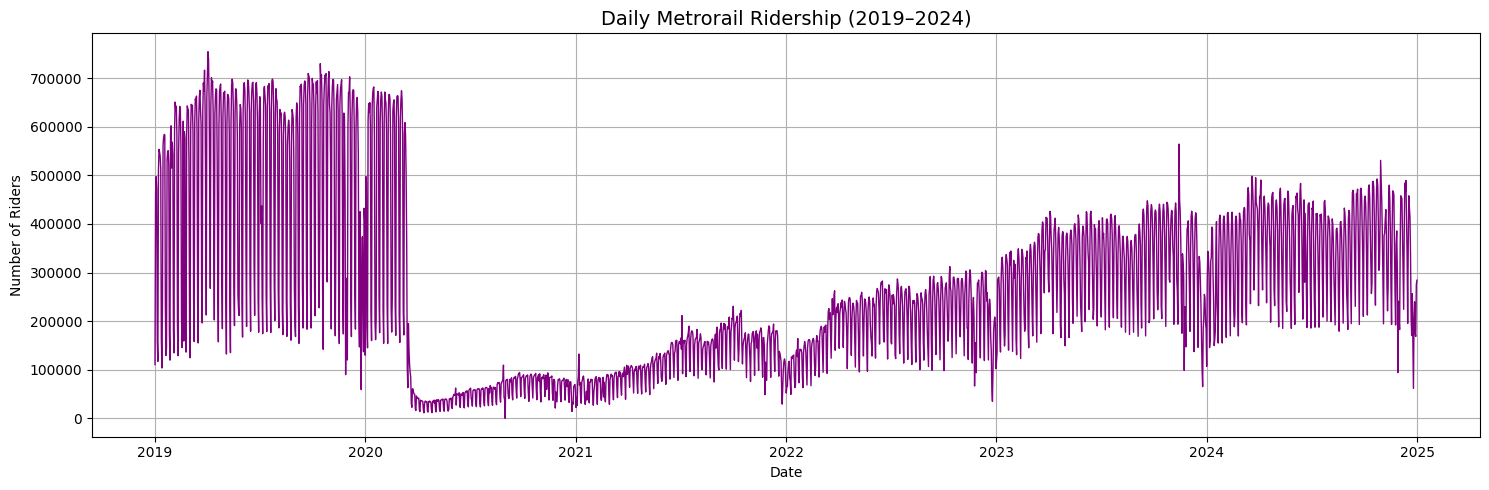

In [51]:
import matplotlib.pyplot as plt

# Set plot size and style
plt.figure(figsize=(15, 5))
plt.plot(df_rail['Date'], df_rail['Rail'], color='purple', linewidth=1)

# Add labels and title
plt.title('Daily Metrorail Ridership (2019–2024)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Number of Riders')
plt.grid(True)
plt.tight_layout()
plt.show()


### 6.2 Monthly Average Metrorail Ridership (2019–2024)
This chart displays the average number of Metrorail riders per month from January 2019 to December 2024. Monthly aggregation helps reveal smoother, long-term patterns by minimizing daily noise. The graph highlights the dramatic decline in ridership during the onset of the COVID-19 pandemic in early 2020, followed by a slow and uneven recovery. Periods of growth, plateau, and minor dips illustrate how public transit usage fluctuated post-pandemic, possibly due to shifting commuter habits, remote work trends, and policy changes.

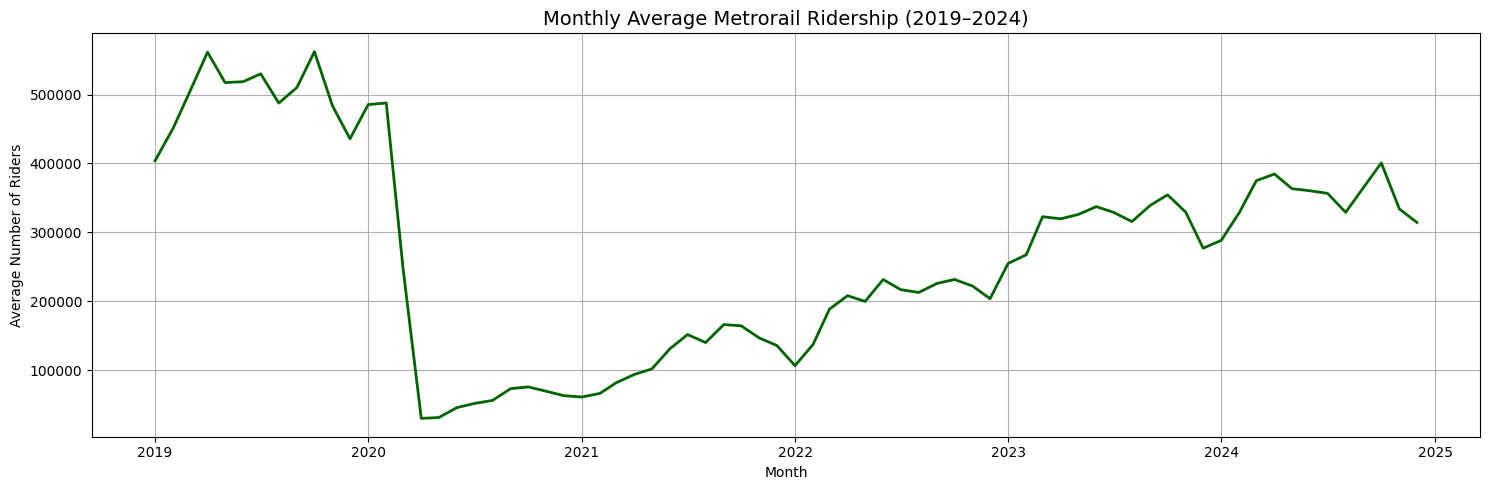

In [52]:
# Group by year and month to calculate monthly average ridership
df_rail['YearMonth'] = df_rail['Date'].dt.to_period('M')
monthly_avg = df_rail.groupby('YearMonth')['Rail'].mean().reset_index()
monthly_avg['YearMonth'] = monthly_avg['YearMonth'].dt.to_timestamp()

# Plot the monthly average
plt.figure(figsize=(15, 5))
plt.plot(monthly_avg['YearMonth'], monthly_avg['Rail'], color='darkgreen', linewidth=2)

# Add labels and title
plt.title('Monthly Average Metrorail Ridership (2019–2024)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Number of Riders')
plt.grid(True)
plt.tight_layout()
plt.show()


### 6.3 Yearly Metrorail Ridership Totals
This bar chart summarizes the total annual Metrorail ridership from 2019 to 2024. It highlights the dramatic drop in usage during the COVID-19 pandemic in 2020, followed by a gradual year-over-year recovery. This visualization is useful for comparing aggregate yearly volumes and assessing the pace of ridership rebound.

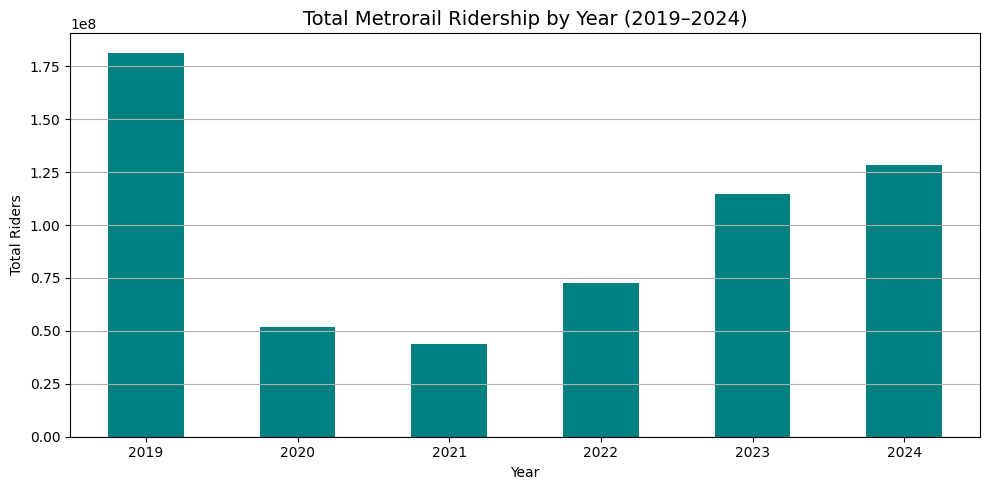

In [53]:
import matplotlib.pyplot as plt

# Group data by year and sum ridership
df_rail['Year'] = df_rail['Date'].dt.year
yearly_totals = df_rail.groupby('Year')['Rail'].sum()

# Plot yearly totals
plt.figure(figsize=(10, 5))
yearly_totals.plot(kind='bar', color='teal')

# Add labels and title
plt.title('Total Metrorail Ridership by Year (2019–2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Riders')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 6.4 Visualize Average Ridership by Day of the Week

This bar chart illustrates the average daily Metrorail ridership grouped by the day of the week. It helps identify typical weekday versus weekend usage patterns. Generally, higher ridership is expected on weekdays due to work commutes, with lower usage on weekends. This visualization supports understanding of routine travel behavior and assists in planning service levels by day.


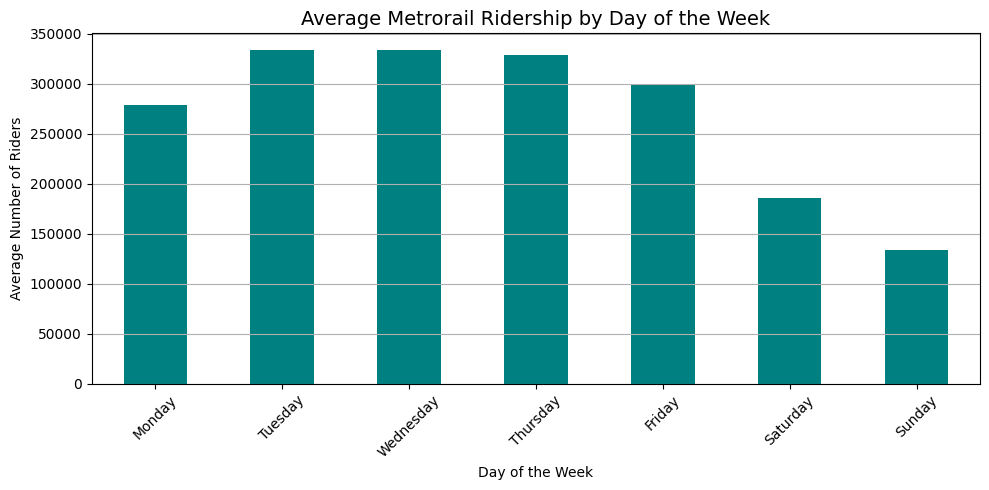

In [55]:
# Group by day of the week and calculate average ridership

# Add a new column for day of the week
df_rail['Day of the week'] = df_rail['Date'].dt.day_name()

avg_by_day = df_rail.groupby('Day of the week')['Rail'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plotting
plt.figure(figsize=(10, 5))
avg_by_day.plot(kind='bar', color='teal')

# Add labels and title
plt.title('Average Metrorail Ridership by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Riders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### 6.5 Visualize Ridership on Holidays vs. Non-Holidays
This bar chart compares the average Metrorail ridership on U.S. federal holidays versus regular non-holiday days from 2019 to 2024. As expected, holiday ridership is significantly lower, reflecting reduced commuter activity and altered travel behavior. This visualization helps highlight how special dates influence public transit usage and can inform holiday scheduling and service planning.

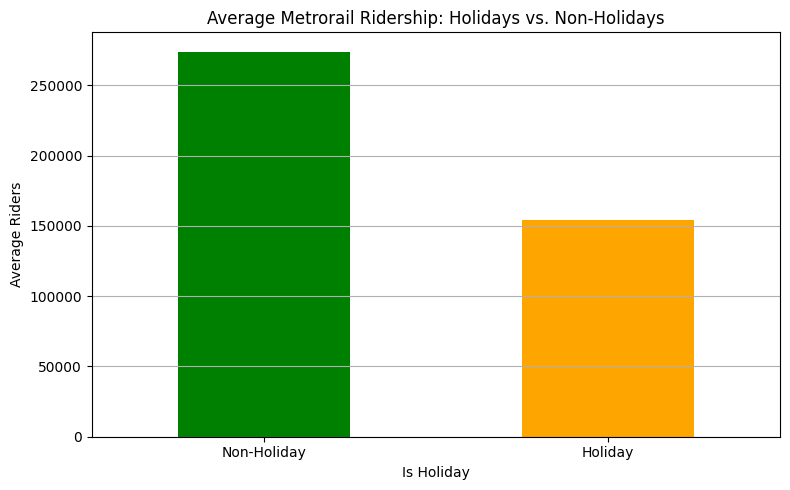

In [57]:
# U.S. federal holidays
from pandas.tseries.holiday import USFederalHolidayCalendar

# Generate list of US federal holidays from 2019–2024
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2019-01-01', end='2024-12-31')

# Create a new column: is_holiday
df_rail['Is Holiday'] = df_rail['Date'].isin(holidays)

# Calculate average ridership for holidays vs. non-holidays
avg_ridership = df_rail.groupby('Is Holiday')['Rail'].mean()

# Plot
plt.figure(figsize=(8, 5))
avg_ridership.plot(kind='bar', color=['green', 'orange'])
plt.title('Average Metrorail Ridership: Holidays vs. Non-Holidays')
plt.ylabel('Average Riders')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### 6.6 Visualize Moving Average (Trend Line)

This line chart overlays a 30-day moving average on top of daily Metrorail ridership data. The moving average helps smooth out short-term fluctuations and highlight longer-term trends, making it easier to identify ridership patterns and inflection points over the 6-year period. This technique is especially useful for identifying the timing and pace of recovery after disruptions like the COVID-19 pandemic.


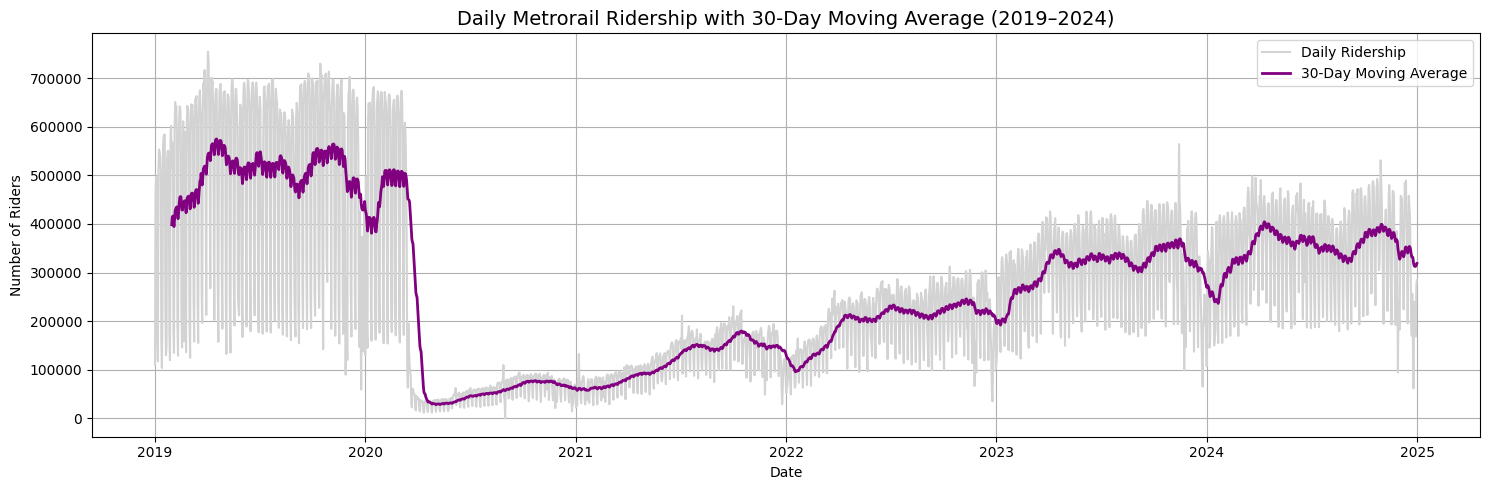

In [58]:
# Calculate 30-day moving average
df_rail['30-Day MA'] = df_rail['Rail'].rolling(window=30).mean()

# Plot the original ridership and the moving average
plt.figure(figsize=(15, 5))
plt.plot(df_rail['Date'], df_rail['Rail'], color='lightgray', label='Daily Ridership')
plt.plot(df_rail['Date'], df_rail['30-Day MA'], color='purple', linewidth=2, label='30-Day Moving Average')

# Add labels and title
plt.title('Daily Metrorail Ridership with 30-Day Moving Average (2019–2024)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Number of Riders')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
